In [7]:
%matplotlib notebook
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
#from matplotlib import animation
#Path to the scripts shared troughout phases
parent_path=os.path.abspath('..')
path_common =  '/'.join(parent_path.split('/')[:-1])
save_path = os.path.join(parent_path,'Two_ended_chain','Plots','Damping')
if(not os.path.exists(save_path)):
    os.makedirs(save_path)

In [8]:
basis_path = os.path.join(parent_path,'Two_ended_chain','damping')
one_basis = os.path.join(basis_path,'one_way','step_error')
one_way_tr = []
one_way_ge_4_pred = []
one_way_ge_4_true = []
one_way_te_7_pred = []
one_way_te_7_true = []
one_way_ge_11_pred = []
one_way_ge_11_true = []
for folder in os.listdir(one_basis):
    path_to_saves = os.path.join(one_basis,folder,'Saves')
    one_way_tr.append(np.load(os.path.join(path_to_saves,'losses_tr.npy')))
    one_way_ge_4_pred.append(np.load(os.path.join(path_to_saves,'predicted_trajectory_4.npy')))
    one_way_ge_4_true.append(np.load(os.path.join(path_to_saves,'true_trajectory_4.npy')))
    one_way_te_7_pred.append(np.load(os.path.join(path_to_saves,'predicted_trajectory_7.npy')))
    one_way_te_7_true.append(np.load(os.path.join(path_to_saves,'true_trajectory_7.npy')))
    one_way_ge_11_pred.append(np.load(os.path.join(path_to_saves,'predicted_trajectory_11.npy')))
    one_way_ge_11_true.append(np.load(os.path.join(path_to_saves,'true_trajectory_11.npy')))


one_way_tr = np.array(one_way_tr)
one_way_te_7_pred = np.array(one_way_te_7_pred)
one_way_te_7_true = np.array(one_way_te_7_true)
one_way_ge_4_pred = np.array(one_way_ge_4_pred)
one_way_ge_4_true = np.array(one_way_ge_4_true)
one_way_ge_11_pred = np.array(one_way_ge_11_pred)
one_way_ge_11_true = np.array(one_way_ge_11_true)
    
    
    
two_basis = os.path.join(basis_path,'two_way','step_error')
two_way_tr = []
two_way_ge_4_pred = []
two_way_ge_4_true = []
two_way_te_7_pred = []
two_way_te_7_true = []
two_way_ge_11_pred = []
two_way_ge_11_true = []
for folder in os.listdir(two_basis):
    path_to_saves = os.path.join(two_basis,folder,'Saves')
    two_way_tr.append(np.load(os.path.join(path_to_saves,'losses_tr.npy')))
    two_way_ge_4_pred.append(np.load(os.path.join(path_to_saves,'predicted_trajectory_4.npy')))
    two_way_ge_4_true.append(np.load(os.path.join(path_to_saves,'true_trajectory_4.npy')))
    two_way_te_7_pred.append(np.load(os.path.join(path_to_saves,'predicted_trajectory_7.npy')))
    two_way_te_7_true.append(np.load(os.path.join(path_to_saves,'true_trajectory_7.npy')))
    two_way_ge_11_pred.append(np.load(os.path.join(path_to_saves,'predicted_trajectory_11.npy')))
    two_way_ge_11_true.append(np.load(os.path.join(path_to_saves,'true_trajectory_11.npy')))

    
two_way_tr = np.array(two_way_tr)
two_way_te_7_pred = np.array(two_way_te_7_pred)
two_way_te_7_true = np.array(two_way_te_7_true)
two_way_ge_4_pred = np.array(two_way_ge_4_pred)
two_way_ge_4_true = np.array(two_way_ge_4_true)
two_way_ge_11_pred = np.array(two_way_ge_11_pred)
two_way_ge_11_true = np.array(two_way_ge_11_true)

<IPython.core.display.Javascript object>


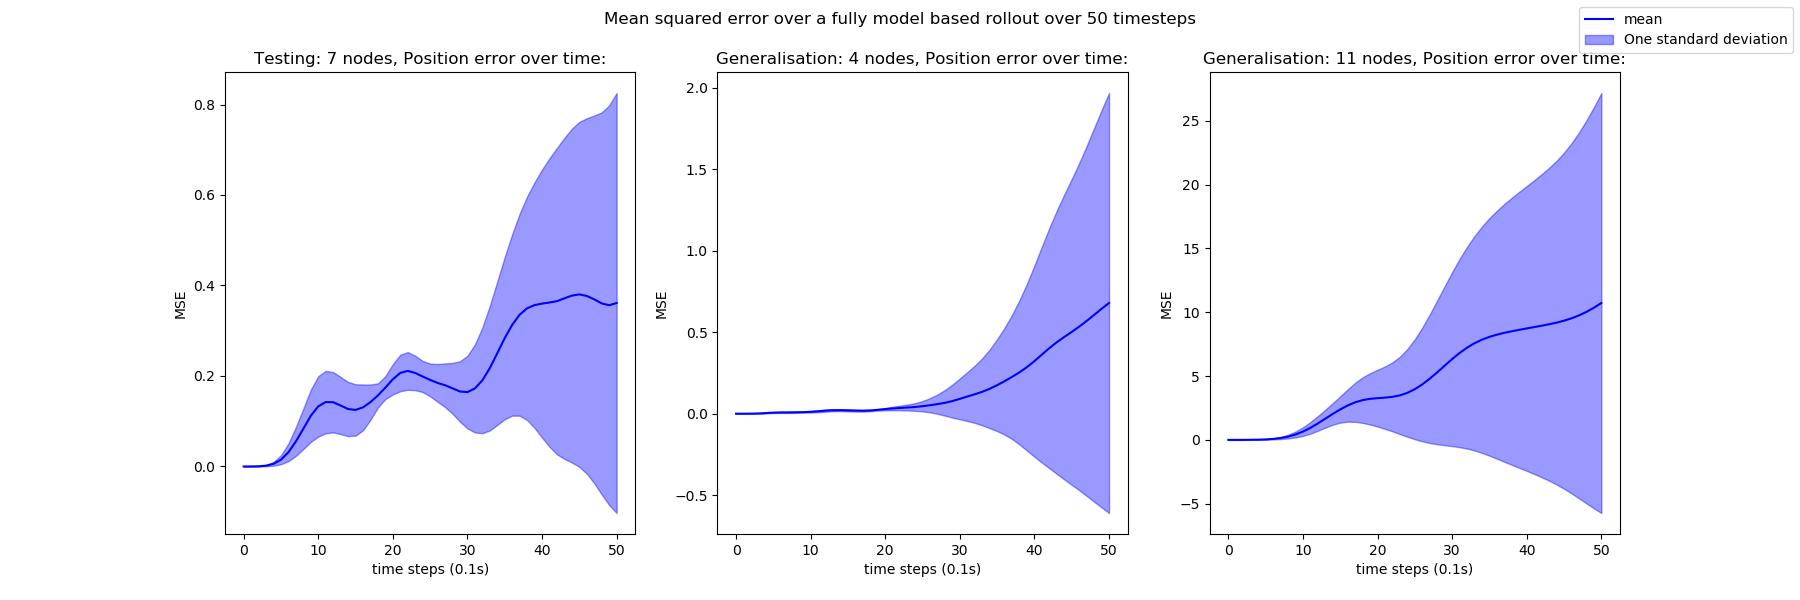

In [12]:
plt.close('all')
fig = plt.figure(1, figsize=(18, 6))
fig.clf()


one_way_error = np.square(one_way_te_7_true - one_way_te_7_pred) # Node positions
one_way_error = np.sum(one_way_error,axis=-1) # 
one_way_error = np.mean(one_way_error,axis = -1) # 
one_way_error = np.mean(one_way_error,axis = 1)
one_way_ge_mean = np.mean(one_way_error,axis = 0)
one_way_ge_std = np.std(one_way_error,axis = 0)

two_way_error = np.square(two_way_te_7_true - two_way_te_7_pred)
two_way_error = np.sum(two_way_error,axis=-1)
two_way_error = np.mean(two_way_error,axis = -1)
two_way_error = np.mean(two_way_error,axis = 1)
two_way_ge_mean = np.mean(two_way_error,axis = 0)
two_way_ge_std = np.std(two_way_error,axis = 0)

x = list(range(len(one_way_ge_mean)))
y1 = one_way_ge_mean
e1 = one_way_ge_std
y2 = two_way_ge_mean
e2 = two_way_ge_std


ax = fig.add_subplot(1, 3, 1)
#ax.plot(x, y2, "r",label="Two way edge")
#plt.fill_between(x, y2-e2, y2+e2, color = "r",alpha=0.4)
ax.plot(x, y1, "b",label="mean")#,label="One way edge")
plt.fill_between(x, y1-e1, y1+e1, color = "b",alpha=0.4,label="One standard deviation")

#ax.legend()
ax.set_title("Testing: 7 nodes, Position error over time:")
ax.set_xlabel("time steps (0.1s)")
ax.set_ylabel("MSE")

one_way_error = np.square(one_way_ge_4_true - one_way_ge_4_pred)
one_way_error = np.sum(one_way_error,axis=-1)
one_way_error = np.mean(one_way_error,axis = -1)
one_way_error = np.mean(one_way_error,axis = 1)
one_way_ge_mean = np.mean(one_way_error,axis = 0)
one_way_ge_std = np.std(one_way_error,axis = 0)

two_way_error = np.square(two_way_ge_4_true - two_way_ge_4_pred)
two_way_error = np.sum(two_way_error,axis=-1)
two_way_error = np.mean(two_way_error,axis = -1)
two_way_error = np.mean(two_way_error,axis = 1)
two_way_ge_mean = np.mean(two_way_error,axis = 0)
two_way_ge_std = np.std(two_way_error,axis = 0)

x = list(range(len(one_way_ge_mean)))
y1 = one_way_ge_mean
e1 = one_way_ge_std
y2 = two_way_ge_mean
e2 = two_way_ge_std

ax = fig.add_subplot(1, 3, 2)
#ax.plot(x, y2, "r",label="Two way edge")
#plt.fill_between(x, y2-e2, y2+e2, color = "r",alpha=0.4)
ax.plot(x, y1, "b")#,label="One way edge")
plt.fill_between(x, y1-e1, y1+e1, color = "b",alpha=0.4)

#ax.legend()
ax.set_title("Generalisation: 4 nodes, Position error over time:")
ax.set_xlabel("time steps (0.1s)")
ax.set_ylabel("MSE")







one_way_error = np.square(one_way_ge_11_true - one_way_ge_11_pred)
one_way_error = np.sum(one_way_error,axis=-1)
one_way_error = np.mean(one_way_error,axis = -1)
one_way_error = np.mean(one_way_error,axis = 1)
one_way_ge_mean = np.mean(one_way_error,axis = 0)
one_way_ge_std = np.std(one_way_error,axis = 0)

two_way_error = np.square(two_way_ge_11_true - two_way_ge_11_pred)
two_way_error = np.sum(two_way_error,axis=-1)
two_way_error = np.mean(two_way_error,axis = -1)
two_way_error = np.mean(two_way_error,axis = 1)
two_way_ge_mean = np.mean(two_way_error,axis = 0)
two_way_ge_std = np.std(two_way_error,axis = 0)

x = list(range(len(one_way_ge_mean)))
y1 = one_way_ge_mean
e1 = one_way_ge_std
y2 = two_way_ge_mean
e2 = two_way_ge_std

ax = fig.add_subplot(1, 3, 3)
#ax.plot(x, y2, "r",label="Two way edge")
#plt.fill_between(x, y2-e2, y2+e2, color = "r",alpha=0.4)
ax.plot(x, y1, "b")#,label="One way edge")
plt.fill_between(x, y1-e1, y1+e1, color = "b",alpha=0.4)

#ax.legend()
ax.set_title("Generalisation: 11 nodes, Position error over time:")
ax.set_xlabel("time steps (0.1s)")
ax.set_ylabel("MSE")

fig.suptitle("Mean squared error over a fully model based rollout over 50 timesteps")
fig.legend()

plt.show()
#Save figure                  
fig.savefig(os.path.join(save_path,"Prediction_errors.pdf"))

<IPython.core.display.Javascript object>


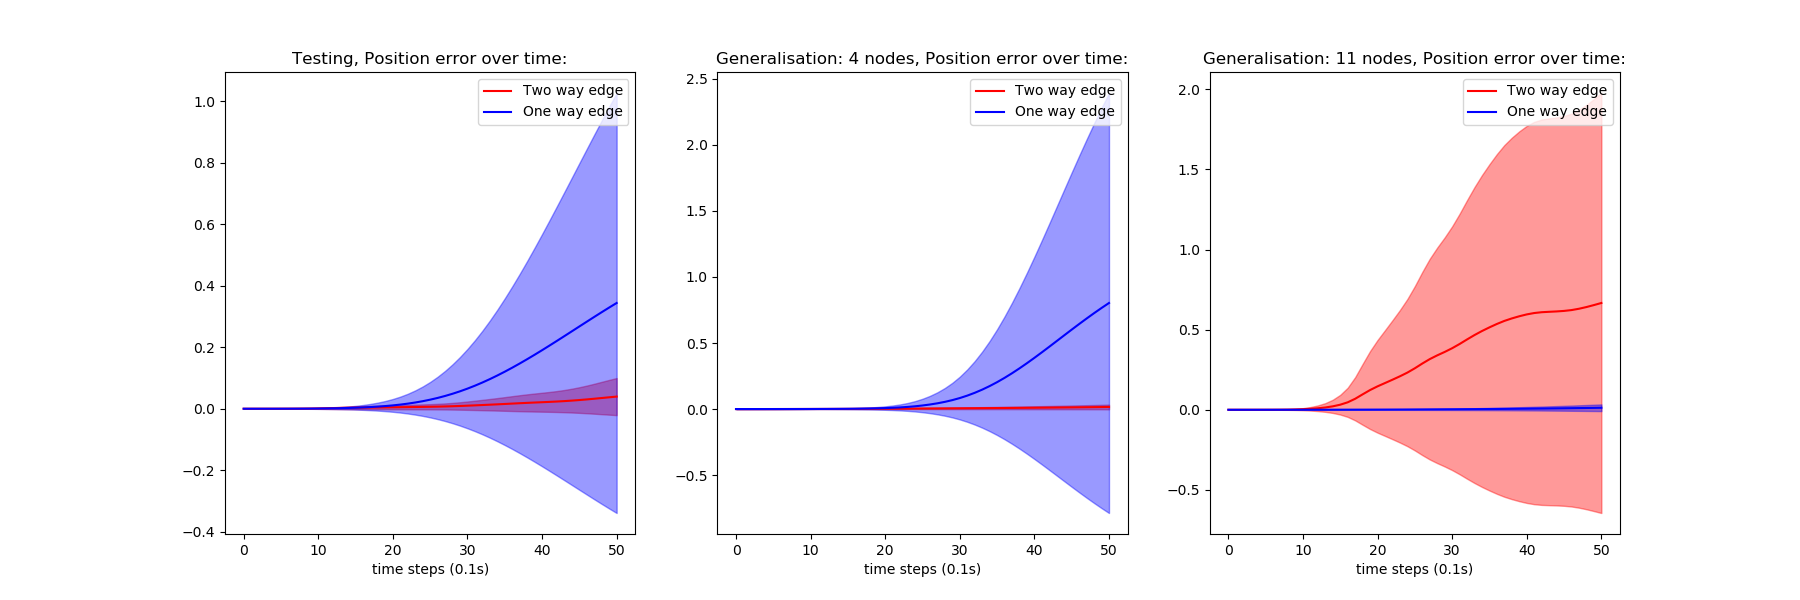

In [20]:
one_way_error = np.square(one_way_te_7_true - one_way_te_7_pred)
one_way_error = np.sum(one_way_error,axis=-1)
first = one_way_error[:,:,:,0]
last = one_way_error[:,:,:,-1]
one_way_error = np.stack([first,last],axis=3)
one_way_error = np.mean(one_way_error,axis = -1)
one_way_error = np.mean(one_way_error,axis = 1)
one_way_ge_mean = np.mean(one_way_error,axis = 0)
one_way_ge_std = np.std(one_way_error,axis = 0)

two_way_error = np.square(two_way_te_7_true - two_way_te_7_pred)
two_way_error = np.sum(two_way_error,axis=-1)
first = two_way_error[:,:,:,0]
last = two_way_error[:,:,:,-1]
two_way_error = np.stack([first,last],axis=3)
two_way_error = np.mean(two_way_error,axis = -1)
two_way_error = np.mean(two_way_error,axis = 1)
two_way_ge_mean = np.mean(two_way_error,axis = 0)
two_way_ge_std = np.std(two_way_error,axis = 0)


x = list(range(len(one_way_ge_mean)))
y1 = one_way_ge_mean
e1 = one_way_ge_std
y2 = two_way_ge_mean
e2 = two_way_ge_std

plt.close('all')
fig = plt.figure(1, figsize=(18, 6))
fig.clf()
ax = fig.add_subplot(1, 3, 1)
ax.plot(x, y2, "r",label="Two way edge")
plt.fill_between(x, y2-e2, y2+e2, color = "r",alpha=0.4)
ax.plot(x, y1, "b",label="One way edge")
plt.fill_between(x, y1-e1, y1+e1, color = "b",alpha=0.4)

ax.legend()
ax.set_title("Testing, Position error over time:")
ax.set_xlabel("time steps (0.1s)")


one_way_error = np.square(one_way_ge_4_true - one_way_ge_4_pred)
one_way_error = np.sum(one_way_error,axis=-1)
first = one_way_error[:,:,:,0]
last = one_way_error[:,:,:,-1]
one_way_error = np.stack([first,last],axis=3)
one_way_error = np.mean(one_way_error,axis = -1)
one_way_error = np.mean(one_way_error,axis = 1)
one_way_ge_mean = np.mean(one_way_error,axis = 0)
one_way_ge_std = np.std(one_way_error,axis = 0)

two_way_error = np.square(two_way_ge_4_true - two_way_ge_4_pred)
two_way_error = np.sum(two_way_error,axis=-1)
first = two_way_error[:,:,:,0]
last = two_way_error[:,:,:,-1]
two_way_error = np.stack([first,last],axis=3)
two_way_error = np.mean(two_way_error,axis = -1)
two_way_error = np.mean(two_way_error,axis = 1)
two_way_ge_mean = np.mean(two_way_error,axis = 0)
two_way_ge_std = np.std(two_way_error,axis = 0)


x = list(range(len(one_way_ge_mean)))
y1 = one_way_ge_mean
e1 = one_way_ge_std
y2 = two_way_ge_mean
e2 = two_way_ge_std

ax = fig.add_subplot(1, 3, 2)
ax.plot(x, y2, "r",label="Two way edge")
plt.fill_between(x, y2-e2, y2+e2, color = "r",alpha=0.4)
ax.plot(x, y1, "b",label="One way edge")
plt.fill_between(x, y1-e1, y1+e1, color = "b",alpha=0.4)

ax.legend()
ax.set_title("Generalisation: 4 nodes, Position error over time:")
ax.set_xlabel("time steps (0.1s)")

one_way_error = np.square(one_way_ge_11_true - one_way_ge_11_pred)
one_way_error = np.sum(one_way_error,axis=-1)
first = one_way_error[:,:,:,0]
last = one_way_error[:,:,:,-1]
one_way_error = np.stack([first,last],axis=3)
one_way_error = np.mean(one_way_error,axis = -1)
one_way_error = np.mean(one_way_error,axis = 1)
one_way_ge_mean = np.mean(one_way_error,axis = 0)
one_way_ge_std = np.std(one_way_error,axis = 0)

two_way_error = np.square(two_way_ge_11_true - two_way_ge_11_pred)
two_way_error = np.sum(two_way_error,axis=-1)
first = two_way_error[:,:,:,0]
last = two_way_error[:,:,:,-1]
two_way_error = np.stack([first,last],axis=3)
two_way_error = np.mean(two_way_error,axis = -1)
two_way_error = np.mean(two_way_error,axis = 1)
two_way_ge_mean = np.mean(two_way_error,axis = 0)
two_way_ge_std = np.std(two_way_error,axis = 0)

x = list(range(len(one_way_ge_mean)))
y1 = one_way_ge_mean
e1 = one_way_ge_std
y2 = two_way_ge_mean
e2 = two_way_ge_std

ax = fig.add_subplot(1, 3, 3)
ax.plot(x, y2, "r",label="Two way edge")
plt.fill_between(x, y2-e2, y2+e2, color = "r",alpha=0.4)
ax.plot(x, y1, "b",label="One way edge")
plt.fill_between(x, y1-e1, y1+e1, color = "b",alpha=0.4)

ax.legend()
ax.set_title("Generalisation: 11 nodes, Position error over time:")
ax.set_xlabel("time steps (0.1s)")



plt.show()
#Save figure                  
fig.savefig(os.path.join(save_path,"Prediction_errors_fixed_only.pdf"))